In [1]:
import pandas as pd
import numpy as np

In [2]:
audit = pd.read_csv('audit_risk.csv')

Print the number of NAs in data

In [3]:
print(audit.isnull().sum())

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64


Read Trial Dataset

In [4]:
trial = pd.read_csv('trial.csv')

In [5]:
print(trial.isnull().sum())

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64


# Fill NA Values

In [6]:
trial['Money_Value']=trial['Money_Value'].fillna(trial['Money_Value'].median())

In [7]:
audit['Money_Value']=audit['Money_Value'].fillna(audit['Money_Value'].median())

In [8]:
#audit.columns = map(str.lower, audit.columns)

In [9]:
#trial.columns = map(str.lower, trial.columns)

In [10]:
audit.dtypes

Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object

In [11]:
trial.dtypes #scorea and scoreb(make float),

Sector_score     float64
LOCATION_ID       object
PARA_A           float64
SCORE_A            int64
PARA_B           float64
SCORE_B            int64
TOTAL            float64
numbers          float64
Marks              int64
Money_Value      float64
MONEY_Marks        int64
District           int64
Loss               int64
LOSS_SCORE         int64
History            int64
History_score      int64
Score            float64
Risk               int64
dtype: object

In [12]:
trial['SCORE_A']=trial['SCORE_A'].astype(float)

In [13]:
trial['SCORE_B']=trial['SCORE_B'].astype(float)

In [14]:
#data=audit.merge(trial, left_on='location_id', right_on='location_id')

In [15]:
#data.shape

# Check if the Audit data has outliers

In [16]:
bplot1=[audit['PARA_A'],audit['Score_A'],audit['Risk_A'],audit['PARA_B'],audit['Score_B'],audit['Risk_B'],audit['TOTAL']]
bplot2=[audit['numbers'],audit['Score_B.1'],audit['Risk_C'],audit['Money_Value'],audit['Score_MV'],audit['Risk_D'],audit['District_Loss']]
bplot3=[audit['PROB'],audit['RiSk_E'],audit['History'],audit['Prob'],audit['Risk_F'],audit['Score'],audit['Inherent_Risk']]
bplot4=[audit['CONTROL_RISK'],audit['Detection_Risk'],audit['Audit_Risk'],audit['Risk']]

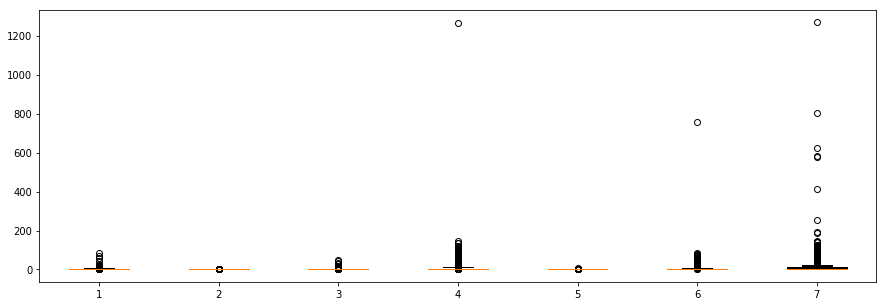

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
bp1=ax.boxplot(bplot1)

bp3=ax.boxplot(bplot3)
#bp4=ax.boxplot(bplot4)

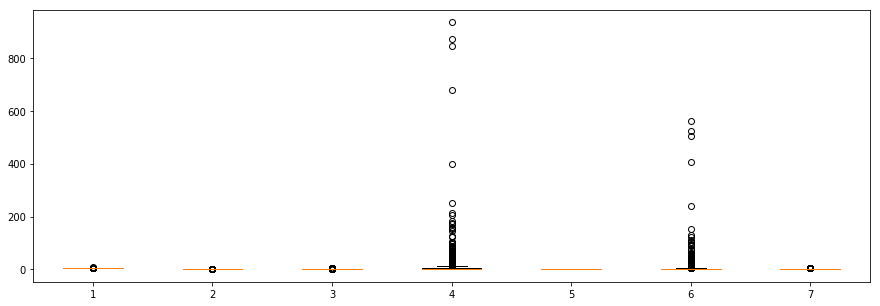

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
bp2=ax.boxplot(bplot2)

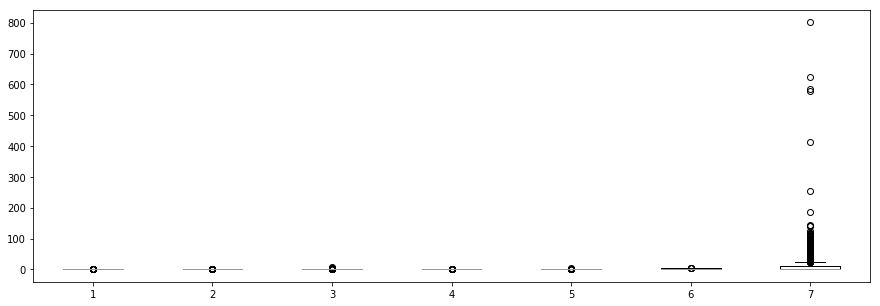

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
bp3=ax.boxplot(bplot3)

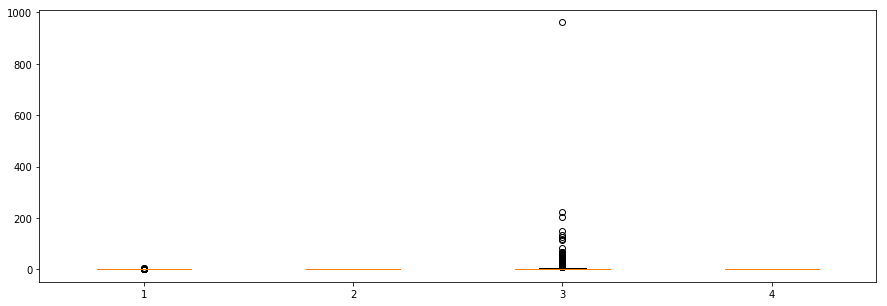

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
bp4=ax.boxplot(bplot4)

# Remove outliers in audit

Many Variables have extremely big outliers which can adversely affect the modelling and prediction. We will delete the records that are 4 standard deviations away from the mean and eliminate outliers

In [21]:
audit.shape

(776, 27)

In [22]:
from scipy import stats
z=np.abs(stats.zscore(audit.iloc[:,np.r_[0,2:27]]))
print(z) #Warning occurs because some of the columns have standard deviation 0

[[0.67046481 0.30480033 1.42984618 ...        nan 0.14112307 1.24268351]
 [0.67046481 0.43173627 0.86976136 ...        nan 0.17228042 0.80471013]
 [0.67046481 0.34187176 0.86976136 ...        nan 0.17748711 0.80471013]
 ...
 [1.45599165 0.38944709 0.86976136 ...        nan 0.17796327 0.80471013]
 [1.45599165 0.39649529 0.86976136 ...        nan 0.17804608 0.80471013]
 [1.45599165 0.43173627 0.86976136 ...        nan 0.17792186 0.80471013]]


C:\Users\parth\Anaconda3\lib\site-packages\scipy\stats\stats.py:2253: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [23]:
outlier =list((np.where(z > 3.99)))

C:\Users\parth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [24]:
rows=set(outlier[0])

Rows to delete

In [25]:
delrows =list(rows)


In [26]:
audit_dt=audit.drop(delrows)

In [27]:
audit_dt.shape

(718, 27)

# Remove 100% Skewed Columns

#Removing 100% skewed data as they are totally useless and does not help in modeling

In [28]:

for i in range(0,len(audit_dt.columns)):
    print(audit_dt.columns.values[i],' is---->   {:,.2f}'.format(audit_dt.iloc[:,i].value_counts(normalize=True).values[0]*100), '% skewed ')

Sector_score  is---->   27.58 % skewed 
LOCATION_ID  is---->   9.75 % skewed 
PARA_A  is---->   20.19 % skewed 
Score_A  is---->   55.85 % skewed 
Risk_A  is---->   20.19 % skewed 
PARA_B  is---->   37.33 % skewed 
Score_B  is---->   70.33 % skewed 
Risk_B  is---->   37.33 % skewed 
TOTAL  is---->   12.26 % skewed 
numbers  is---->   94.57 % skewed 
Score_B.1  is---->   94.57 % skewed 
Risk_C  is---->   94.57 % skewed 
Money_Value  is---->   45.40 % skewed 
Score_MV  is---->   77.99 % skewed 
Risk_D  is---->   45.54 % skewed 
District_Loss  is---->   85.52 % skewed 
PROB  is---->   100.00 % skewed 
RiSk_E  is---->   85.52 % skewed 
History  is---->   95.82 % skewed 
Prob  is---->   95.82 % skewed 
Risk_F  is---->   95.82 % skewed 
Score  is---->   40.39 % skewed 
Inherent_Risk  is---->   7.24 % skewed 
CONTROL_RISK  is---->   81.89 % skewed 
Detection_Risk  is---->   100.00 % skewed 
Audit_Risk  is---->   7.24 % skewed 
Risk  is---->   65.32 % skewed 


In [29]:
audit_dt.drop(['PROB'], axis=1, inplace = True)

In [30]:
audit_dt.drop(['Detection_Risk'], axis=1, inplace = True)

In [31]:
audit_dt.shape

(718, 25)

# Remove Outliers in Trial

Remove Everything 4 Standard deviation away from mean

In [32]:
trial.shape

(776, 18)

In [33]:
from scipy import stats
z=np.abs(stats.zscore(trial.iloc[:,np.r_[0,2:18]]))
print(z) 

[[0.67046481 0.30480033 1.42984618 ... 0.24656792 0.35250258 0.77246865]
 [0.67046481 0.43173627 0.86976136 ... 0.24656792 0.81850259 1.29455091]
 [0.67046481 0.34187176 0.86976136 ... 0.24656792 0.81850259 1.29455091]
 ...
 [1.45599165 0.38944709 0.86976136 ... 0.24656792 0.81850259 1.29455091]
 [1.45599165 0.39649529 0.86976136 ... 0.24656792 0.81850259 1.29455091]
 [1.45599165 0.43173627 0.86976136 ... 0.24656792 0.81850259 1.29455091]]


In [34]:
outlier =list((np.where(z > 3.99)))

In [35]:
rows=set(outlier[0])

In [36]:
delrows =list(rows)

In [37]:
trial_dt=trial.drop(delrows)
trial_dt.shape

(718, 18)

# Remove 100% Skewed Columns 

In [38]:
for i in range(0,len(trial_dt.columns)):
    print(trial_dt.columns.values[i],' is---->   {:,.2f}'.format(trial_dt.iloc[:,i].value_counts(normalize=True).values[0]*100), '% skewed ')

Sector_score  is---->   27.58 % skewed 
LOCATION_ID  is---->   9.75 % skewed 
PARA_A  is---->   20.19 % skewed 
SCORE_A  is---->   55.85 % skewed 
PARA_B  is---->   37.33 % skewed 
SCORE_B  is---->   70.33 % skewed 
TOTAL  is---->   12.26 % skewed 
numbers  is---->   94.57 % skewed 
Marks  is---->   94.57 % skewed 
Money_Value  is---->   45.40 % skewed 
MONEY_Marks  is---->   77.99 % skewed 
District  is---->   85.52 % skewed 
Loss  is---->   100.00 % skewed 
LOSS_SCORE  is---->   100.00 % skewed 
History  is---->   95.82 % skewed 
History_score  is---->   95.82 % skewed 
Score  is---->   40.39 % skewed 
Risk  is---->   59.61 % skewed 


In [39]:
trial_dt.drop(['Loss'], axis=1, inplace = True)
trial_dt.drop(['LOSS_SCORE'], axis=1, inplace = True)

In [40]:
trial_dt.shape

(718, 16)

# Merge two datasets into one 

In [41]:
cols_use = trial_dt.columns.difference(audit_dt.columns)

In [42]:
cols_use

Index(['District', 'History_score', 'MONEY_Marks', 'Marks', 'SCORE_A',
       'SCORE_B'],
      dtype='object')

In [43]:
data = pd.merge(audit_dt,trial_dt[cols_use],how='inner',left_index=True, right_index=True)

In [44]:
data = data.drop(['SCORE_A','SCORE_B'],axis = 1)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 775
Data columns (total 29 columns):
Sector_score     718 non-null float64
LOCATION_ID      718 non-null object
PARA_A           718 non-null float64
Score_A          718 non-null float64
Risk_A           718 non-null float64
PARA_B           718 non-null float64
Score_B          718 non-null float64
Risk_B           718 non-null float64
TOTAL            718 non-null float64
numbers          718 non-null float64
Score_B.1        718 non-null float64
Risk_C           718 non-null float64
Money_Value      718 non-null float64
Score_MV         718 non-null float64
Risk_D           718 non-null float64
District_Loss    718 non-null int64
RiSk_E           718 non-null float64
History          718 non-null int64
Prob             718 non-null float64
Risk_F           718 non-null float64
Score            718 non-null float64
Inherent_Risk    718 non-null float64
CONTROL_RISK     718 non-null float64
Audit_Risk       718 non-n

In [46]:
#data=audit_dt.merge(trial_dt, left_on='location_id', right_on='location_id')

In [47]:
data.shape

(718, 29)

# Remove one variable out of Highly Correlated variable pairs

In [48]:
corrmat= (data.corr().abs())
highcorr=np.where(corrmat>0.9999999999999999)



In [49]:
highcorr

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  8,  8,  9, 10, 10, 11, 12, 12,
        13, 14, 14, 15, 16, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 20, 21,
        22, 23, 24, 24, 25, 25, 25, 25, 26, 26, 27, 27], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 27,  9,  8, 10, 11, 12, 26,
        13, 14, 24, 15, 16, 17, 18, 25, 16, 17, 25, 16, 18, 25, 19, 20, 21,
        22, 23, 14, 24, 16, 17, 18, 25, 12, 26,  8, 27], dtype=int64))

In [50]:
highcorr=set([(corrmat.columns[x],corrmat.columns[y]) for x,y in zip(*highcorr) if x!=y])

In [51]:
highcorr=list(highcorr)

In [52]:
for i in highcorr:
    print(i[0],'   ',i[1],'------>',data[i[0]].corr(data[i[1]]))
    

MONEY_Marks     Score_MV ------> 1.0
Score_MV     MONEY_Marks ------> 1.0
Prob     History_score ------> 1.0
numbers     Risk_C ------> 1.0
District_Loss     District ------> 1.0
Risk_F     History ------> 1.0
District     District_Loss ------> 1.0
History     Prob ------> 1.0
Prob     History ------> 1.0
numbers     Marks ------> 1.0
History_score     Risk_F ------> 1.0
Marks     numbers ------> 1.0
History_score     Prob ------> 1.0
Risk_C     numbers ------> 1.0
History     Risk_F ------> 1.0
History     History_score ------> 1.0
Risk_F     History_score ------> 1.0
History_score     History ------> 1.0


In [53]:
data = data.drop(['Marks','Risk_F','District','Prob','History_score','Risk_C'],axis = 1)

In [54]:
print(data.isnull().sum())

Sector_score     0
LOCATION_ID      0
PARA_A           0
Score_A          0
Risk_A           0
PARA_B           0
Score_B          0
Risk_B           0
TOTAL            0
numbers          0
Score_B.1        0
Money_Value      0
Score_MV         0
Risk_D           0
District_Loss    0
RiSk_E           0
History          0
Score            0
Inherent_Risk    0
CONTROL_RISK     0
Audit_Risk       0
Risk             0
MONEY_Marks      0
dtype: int64


In [55]:
data.shape

(718, 23)

In [56]:
data.columns.values

array(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A',
       'PARA_B', 'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'RiSk_E',
       'History', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Audit_Risk',
       'Risk', 'MONEY_Marks'], dtype=object)

In [57]:
#data = pd.concat([data, pd.get_dummies(data['LOCATION_ID'], prefix='LOCID')], axis=1)
data.drop(['LOCATION_ID'], axis=1, inplace = True)



In [58]:
import csv
with open('data.csv','w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)
    
csvfile.close()

data.to_csv('data.csv')

In [59]:
y = data['Audit_Risk']

In [60]:
X=data.drop(['Audit_Risk'],axis=1, inplace=False)

In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [62]:
X_train_dt, X_test_dt, y_train, y_test = train_test_split(X,y,random_state=0,)

In [63]:
X.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,Score_MV,Risk_D,District_Loss,RiSk_E,History,Score,Inherent_Risk,CONTROL_RISK,Risk,MONEY_Marks
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,...,0.2,0.676,2,0.4,0,2.4,8.574,0.4,1,2
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,...,0.2,0.188,2,0.4,0,2.0,2.554,0.4,0,2
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,...,0.2,0.000,2,0.4,0,2.0,1.548,0.4,0,2
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,...,0.2,0.000,2,0.4,0,2.0,1.416,0.4,0,2
5,3.89,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5.0,0.2,...,0.2,0.590,2,0.4,0,2.0,2.156,0.4,0,2


In [64]:


Scaler= MinMaxScaler()
X_train = Scaler.fit_transform(X_train_dt)
X_test = Scaler.transform(X_test_dt)

# Modelling - Selection of best algorithm is based on Cross Val Score

# Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print("Train scores: {}".format(lreg.score(X_train, y_train)))
print("Test scores: {}".format(lreg.score(X_test, y_test)))
scorestrain = cross_val_score(lreg, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(lreg, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

Train scores: 0.9041907042606854
Test scores: 0.8760980847980329
Cross-validation Train scores: -5.867552130895314e+18
Cross-validation Test scores: 0.5800738185036601


# Ridge Regression

In [66]:
from sklearn.linear_model import Ridge
x_range = [0.001,0.01,0.1,1,10,100]
train_score_list=[]
test_score_list=[]

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

In [67]:
print(train_score_list)
print(test_score_list)


[0.9039865068295306, 0.9033341259381469, 0.9021468336159301, 0.9002059483247744, 0.8477286410287884, 0.6197311559551457]
[0.8771730109718886, 0.8804620241143158, 0.8825958941260592, 0.88389337239058, 0.8488672473790292, 0.6446545683375012]


Text(0.5,0,'$\\alpha$')

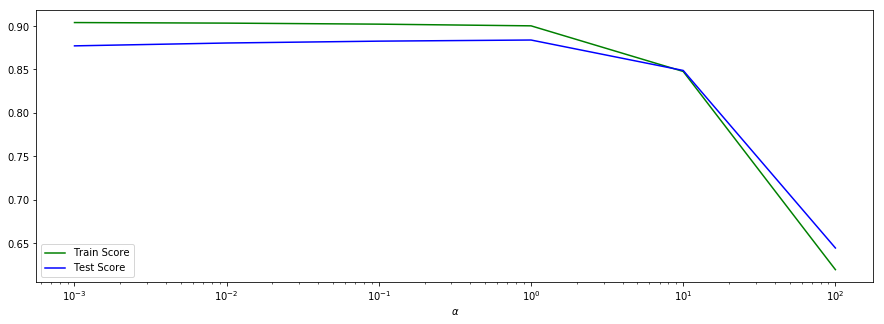

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

Best Parameter alpha=1

In [69]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))
scorestrain = cross_val_score(ridge, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(ridge, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))


Train score: 0.9002
Test score: 0.8839
Cross-validation Train scores: 0.8722913546558937
Cross-validation Test scores: 0.821891549753834


In [70]:
ridge.coef_

array([ 0.7242462 , -0.11315197,  1.03612461,  1.03519106,  4.14875404,
       -0.01558595,  3.64636776,  4.01918289, -0.13266813, -0.13266813,
       11.75576361,  0.63128527, 11.53360998,  2.02836135,  2.02836135,
        7.59465399,  1.12518035, 12.57800315,  3.88379223, -3.12149139,
        0.63128527])

In [71]:
max(ridge.coef_)

12.578003154503616

In [72]:
ridge.intercept_

-0.5043020706146724

In [73]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 0.1, 50).reshape(-1,1)
x_range2 = np.linspace(0.1, 10, 100).reshape(-1,1)

In [74]:
x_range = np.append(x_range1, x_range2)
coeff = []



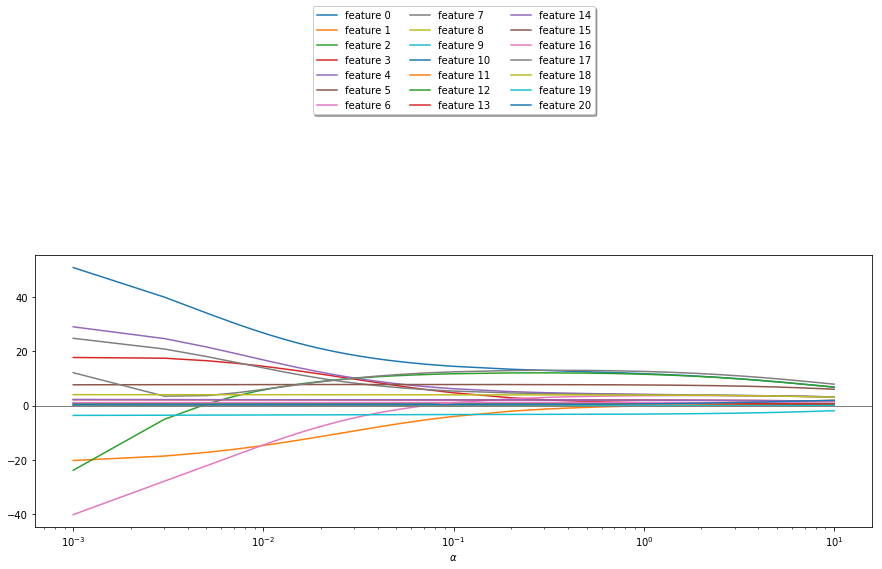

In [75]:
fig ,ax= plt.subplots(figsize = (15,5))
for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,21):
    plt.plot(x_range, coeff[:,i],label = 'feature {:d}'.format(i))
    
plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

# Lasso Regression

In [76]:
from sklearn.linear_model import Lasso
x_range = [0.000001,0.00001,0.0001,0.001, 0.01, 0.1, 1]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

C:\Users\parth\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [77]:

print(train_score_list)
print(test_score_list)



[0.9038198899107206, 0.9038102893981732, 0.9036917575482148, 0.902507052648137, 0.9006199100108897, 0.8688673130021796, 0.3218781657667741]
[0.8798972789852963, 0.8799901902933096, 0.8809018374724826, 0.8836748735611468, 0.8895485334702968, 0.8782356890814087, 0.327105840801009]


Text(0.5,0,'$\\alpha$')

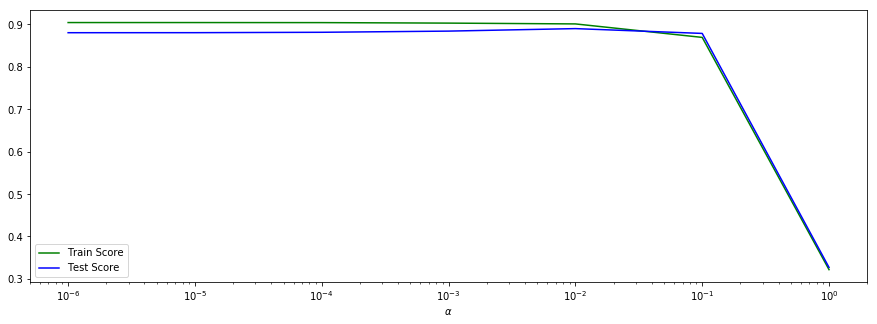

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

C:\Users\parth\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


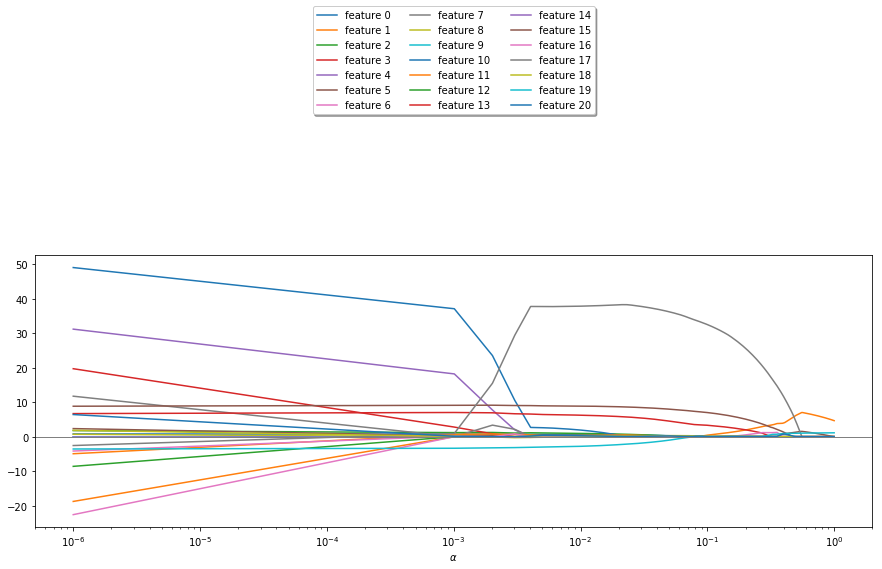

In [79]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.000001, 0.1, 100).reshape(-1,1)
x_range2 = np.linspace(0.1, 1, 100).reshape(-1,1)
x_range = np.append(x_range1, x_range2)
coeff = []

fig ,ax= plt.subplots(figsize = (15,5))
for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,21):
    plt.plot(x_range, coeff[:,i],label = 'feature {:d}'.format(i))
    
plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

Best Parameter alpha=0.1

In [80]:
lasso = Lasso(0.1)
lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))
scorestrain = cross_val_score(lasso, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(lasso, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

Train score: 0.8689
Test score: 0.8782
Cross-validation Train scores: 0.8450223351757137
Cross-validation Test scores: 0.7785153072871435


Para_b and Audit_Risk plot

Text(0,0.5,'Audit_Risk')

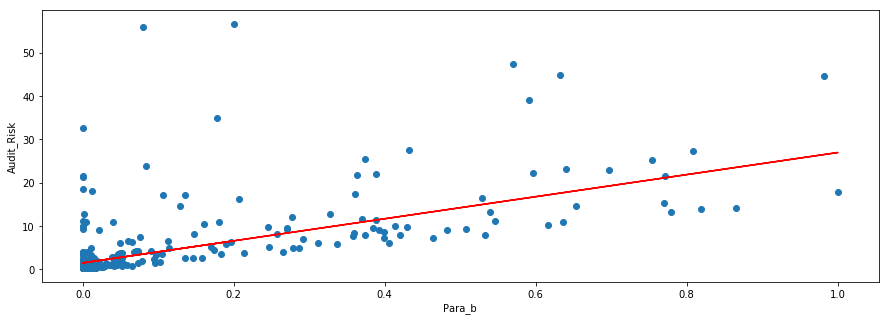

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt

lasso = Lasso(0.1)
X_train_Parab = X_train[:,4].reshape(-1,1)
lasso.fit(X_train_Parab,y_train)
y_predict = lasso.predict(X_train_Parab)
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(X_train_Parab, y_predict, c = 'r')
plt.scatter(X_train_Parab,y_train)
plt.xlabel('Para_b')
plt.ylabel('Audit_Risk')

Inherent Risk and Audit_Risk plot

Text(0,0.5,'Audit_Risk')

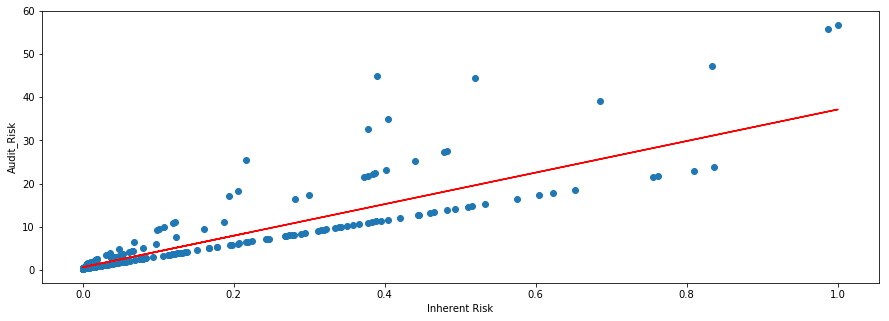

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt

lasso = Lasso(0.1)
X_train_inherent = X_train[:,17].reshape(-1,1)
lasso.fit(X_train_inherent,y_train)
y_predict = lasso.predict(X_train_inherent)
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(X_train_inherent, y_predict, c = 'r')
plt.scatter(X_train_inherent,y_train)
plt.xlabel('Inherent Risk')
plt.ylabel('Audit_Risk')

# SGD Regressor

In [86]:
x_range = [0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2]

train_score_list = []
test_score_list = []

for x in x_range:
    from sklearn.linear_model import SGDRegressor
    sgd_reg = SGDRegressor(random_state=0, max_iter=100000, alpha=x, learning_rate='optimal', penalty='l1')
    sgd_reg.fit(X_train, y_train)
    train_score_list.append(sgd_reg.score(X_train,y_train))
    test_score_list.append(sgd_reg.score(X_test, y_test))
    
print(train_score_list)
print(test_score_list)

[0.8925475427404396, 0.8873353784641308, 0.8782336852594225, 0.8717435319393699, 0.8660865265085363, 0.8594353794266021, 0.8517954407470928, 0.7317541083163611]
[0.8873440178532987, 0.8845362209435095, 0.8786799905250092, 0.874281747206436, 0.8694418090709096, 0.8635516893583748, 0.856693597718812, 0.7428442029599607]


Text(0.5,0,'Alpha')

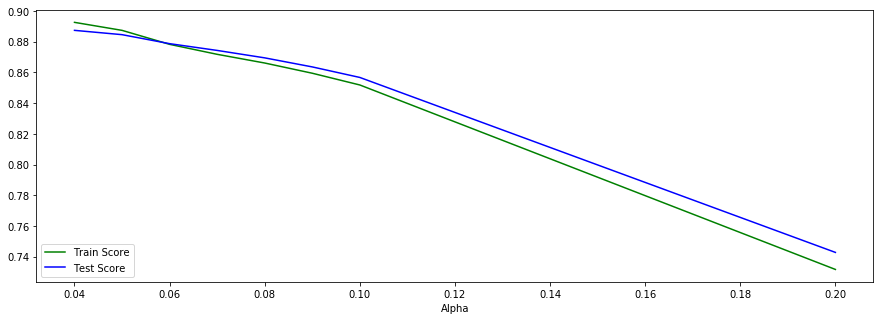

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
#plt.xscale('log')
#plt.yscale('log')
plt.legend(loc = 3)
plt.xlabel('Alpha')

Best Parameter alpha=0.04

In [88]:
sgd_reg = SGDRegressor(random_state=0, max_iter=100000, alpha=0.04, learning_rate='optimal', penalty='l1')
sgd_reg.fit(X_train, y_train)
print("Train scores: {}".format(sgd_reg.score(X_train, y_train)))
print("Test scores: {}".format(sgd_reg.score(X_test, y_test)))
scorestrain = cross_val_score(sgd_reg, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(sgd_reg, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

Train scores: 0.8925475427404396
Test scores: 0.8873440178532987
Cross-validation Train scores: 0.8075670200556151
Cross-validation Test scores: -192.19028760752997


# Polynomial Regression

In [89]:
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.model_selection import cross_val_score

train_score_list = []
test_score_list = []

for n in [2,3,4]:
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg = LinearRegression()
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))
    

In [90]:
print(train_score_list)
print(test_score_list)

[1.0, 1.0, 1.0]
[0.9999998347603218, 0.9996017701120294, 0.9985077354855005]


Text(0.5,0,'Degree')

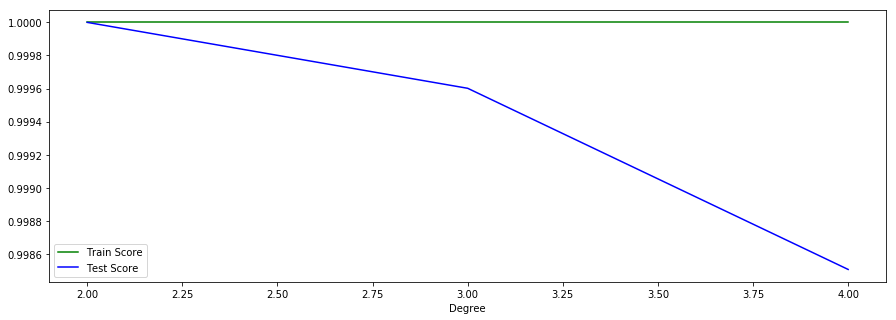

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot([2,3,4], train_score_list, c = 'g', label = 'Train Score')
plt.plot([2,3,4], test_score_list, c = 'b', label = 'Test Score')
#plt.xscale('log')
#plt.yscale('log')
plt.legend(loc = 3)
plt.xlabel('Degree')

In [92]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg = LinearRegression()
lreg.fit(X_train_poly, y_train)
print("Train scores: {}".format(lreg.score(X_train_poly, y_train)))
print("Test scores: {}".format(lreg.score(X_test_poly, y_test)))
scorestrain = cross_val_score(lreg, X_train_poly, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(lreg, X_test_poly, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

Train scores: 1.0
Test scores: 0.9999998347603218
Cross-validation Train scores: 0.999984393555084
Cross-validation Test scores: 0.9694680301206704


# KNN Regressor

In [93]:
from sklearn.neighbors import KNeighborsRegressor

train_score_list = []
test_score_list = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_list.append(knn_reg.score(X_train, y_train))
    test_score_list.append(knn_reg.score(X_test, y_test))

print(train_score_list)
print(test_score_list)

[1.0, 0.9539858648377202, 0.9197037966054623, 0.8843346672431027, 0.8629532251423477, 0.83656983652512, 0.8180640638026867, 0.8150027170153858, 0.7978946833578636]
[0.6970277525121955, 0.7981114461806766, 0.7617077180731096, 0.7240838154240705, 0.730971540978108, 0.6970673752387315, 0.7137805098683871, 0.7238981604461423, 0.7231400947237827]


Text(0,0.5,'MSE')

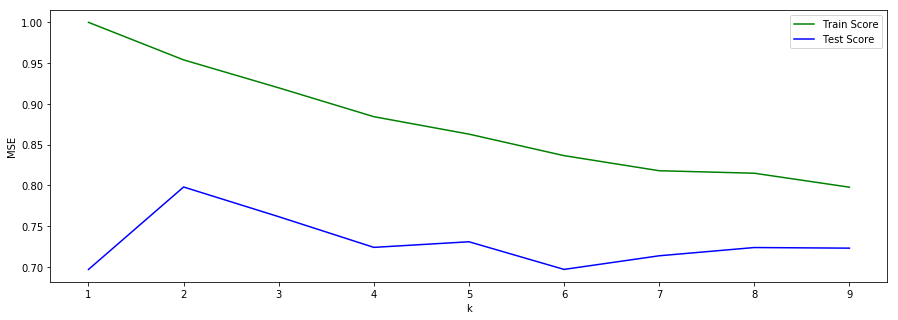

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
x_axis = range(1,10)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

Best Parameter K=2

In [95]:
from sklearn.model_selection import cross_val_score
knn_reg = KNeighborsRegressor(2)
knn_reg.fit(X_train, y_train)
print("Train scores: {}".format(knn_reg.score(X_train, y_train)))
print("Test scores: {}".format(knn_reg.score(X_test, y_test)))
scorestrain = cross_val_score(knn_reg, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(lreg, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

Train scores: 0.9539858648377202
Test scores: 0.7981114461806766
Cross-validation Train scores: 0.7898947013293828
Cross-validation Test scores: 0.5800738185036601


# SVM Simple Regression

In [96]:
from sklearn.svm import SVR
clf = SVR()
clf.fit(X_train,y_train)

print("Train scores: {}".format(clf.score(X_train, y_train)))
print("Test scores: {}".format(clf.score(X_test, y_test)))
scorestrain = cross_val_score(clf, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(clf, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))


Train scores: 0.5006260379441866
Test scores: 0.5313757878544834
Cross-validation Train scores: 0.4420082773732148
Cross-validation Test scores: 0.31387282765738


# SVM Kernelized Regression - RBF

In [97]:
c_range = [1,10,100,200,300]
g_range = [0.01,0.1,1,5]

train_score_list = []
test_score_list = []
index = []

for x in c_range:
    for g in g_range:
        index.append((x,g))
        svr_rbf = SVR(kernel='rbf', C=x, gamma=g, epsilon=.1)
        svr_rbf.fit(X_train,y_train)
        train_score_list.append(svr_rbf.score(X_train,y_train))
        test_score_list.append(svr_rbf.score(X_test, y_test))

In [98]:
print(train_score_list)
print(test_score_list)

[0.30005274482829825, 0.5793681246743418, 0.4903847693470116, 0.2816027595927604, 0.6252629724539893, 0.8962301365675509, 0.8873874199061336, 0.7777170722029642, 0.8731148494415849, 0.9943569557613108, 0.999901335626803, 0.9998837807365482, 0.8995414654439079, 0.9988593076346929, 0.9999023584309831, 0.9998837807365482, 0.9117908337541425, 0.9998320882171475, 0.9999023584309831, 0.9998837807365482]
[0.3297095489879952, 0.5958866646364339, 0.4415992258484387, 0.20542368516553144, 0.6599391787720175, 0.87463196397656, 0.7354476866993118, 0.43672643207297035, 0.8780180655822718, 0.9613804774360293, 0.8045351812248392, 0.4857322070269251, 0.8944969317182571, 0.9792001499721038, 0.8044514215104654, 0.4857322070269251, 0.901040770245809, 0.9876997960245523, 0.8044514215104654, 0.4857322070269251]


Text(0.5,0,'C and Gamma')

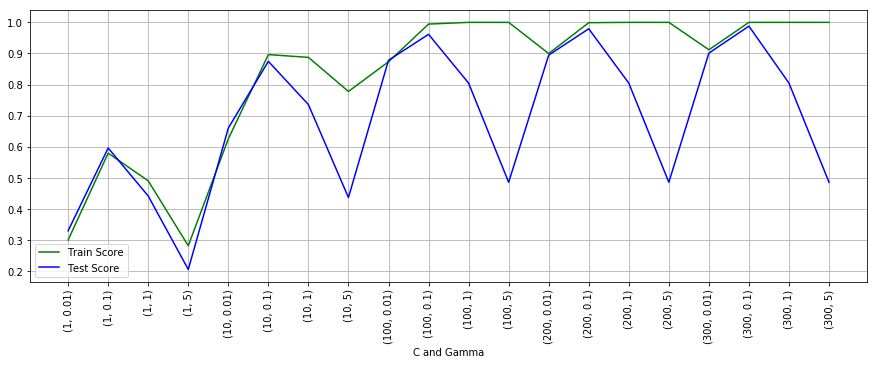

In [99]:

%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(range(len(index)), train_score_list, c = 'g', label = 'Train Score')
plt.plot(range(len(index)), test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.grid(True)
plt.xticks(range(len(index)), index, rotation=90)
plt.xlabel(r'C and Gamma')

Best Parameters ( gamma = 0.1, C=300 )

In [100]:
svr_rbf = SVR(kernel='rbf', C=300, gamma=0.1, epsilon=.1)
svr_rbf.fit(X_train,y_train)

SVR(C=300, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [101]:
print("Train scores: {}".format(svr_rbf.score(X_train, y_train)))
print("Test scores: {}".format(svr_rbf.score(X_test, y_test)))
scorestrain = cross_val_score(svr_rbf, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(svr_rbf, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))


Train scores: 0.9998320882171475
Test scores: 0.9876997960245523
Cross-validation Train scores: 0.9726474727864766
Cross-validation Test scores: 0.8494526440167384


# Predict based on RBF SVR

In [102]:
svr_rbf = SVR(kernel='rbf', C=300, gamma=0.1, epsilon=.1)
svr_rbf.fit(X_train,y_train)
pred = svr_rbf.predict(X_test)

print("Min of Pred: {}".format(min(pred)))
print("Max of Pred: {}".format(max(pred)))
print("Min of Y test: {}".format(min(y_test)))
print("Max of Y test: {}".format(max(y_test)))

Min of Pred: 0.18108445752467262
Max of Pred: 42.080309054330414
Min of Y test: 0.28
Max of Y test: 45.983999999999995


In [103]:
x_range = np.linspace(0.18, 46, 180).reshape(-1,)

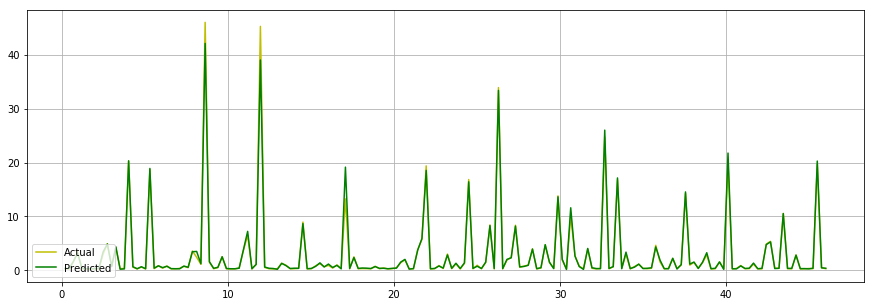

In [104]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(x_range, y_test, c = 'y', label = 'Actual')
plt.plot(x_range, pred, c = 'g', label = 'Predicted')
#plt.xscale('log')
plt.legend(loc = 3)
plt.grid(True)
#plt.xlabel(r'Degree')

# SVM Kernelized Regression - Linear


In [105]:
c_range = [1,10,100,200,300]

train_score_list = []
test_score_list = []

for x in c_range:
    svr_lin = SVR(kernel='linear', C=x)
    svr_lin.fit(X_train,y_train)
    train_score_list.append(svr_lin.score(X_train,y_train))
    test_score_list.append(svr_lin.score(X_test, y_test))

In [106]:
print(train_score_list)
print(test_score_list)

[0.8093355913798952, 0.8319127325954022, 0.8321578916906347, 0.8321545895382163, 0.8322144683199802]
[0.8275849676898617, 0.8528434273921094, 0.8529821535863826, 0.8531799768616596, 0.8532698643095842]


Text(0.5,0,'C')

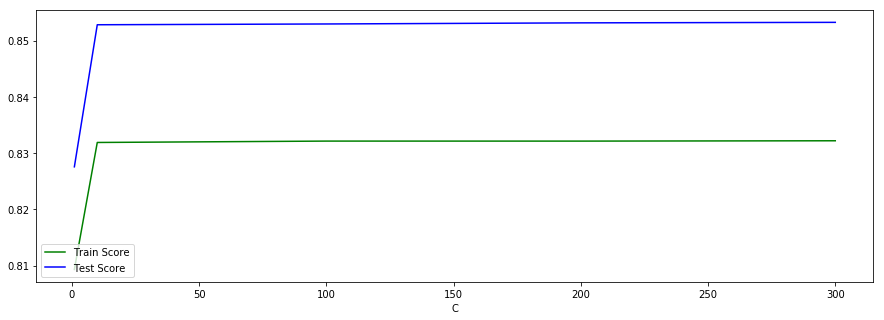

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(c_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(c_range, test_score_list, c = 'b', label = 'Test Score')
#plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'C')

Best Parameter C=10

In [108]:
svr_lin = SVR(kernel='linear', C=10)
svr_lin.fit(X_train,y_train)

print("Train scores: {}".format(svr_lin.score(X_train, y_train)))
print("Test scores: {}".format(svr_lin.score(X_test, y_test)))
scorestrain = cross_val_score(svr_lin, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(svr_lin, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

Train scores: 0.8319127325954022
Test scores: 0.8528434273921094
Cross-validation Train scores: 0.8342973446753393
Cross-validation Test scores: 0.8471845299752297


# SVM Kernelized Regression - Polynomial

In [109]:
deg_range = [1,2,3,4]
coef_range = [1,2,3,4]

train_score_list = []
test_score_list = []
index=[]

for x in deg_range:
    for c in coef_range:
        index.append((x,c))
        svr_poly = SVR(kernel='poly', C=200, degree=x, epsilon=.1,coef0=c)
        svr_poly.fit(X_train,y_train)
        train_score_list.append(svr_poly.score(X_train,y_train))
        test_score_list.append(svr_poly.score(X_test, y_test))

In [110]:
print(train_score_list)
print(test_score_list)

[0.8317209594321762, 0.8317215110021715, 0.8317215110126533, 0.8317161407796669, 0.9763057358929035, 0.9761410978999263, 0.9760988061793207, 0.9759839154097404, 0.9979486596415765, 0.9996394067472382, 0.9999033430309255, 0.9999084090690387, 0.9997767074495957, 0.9999359168689138, 0.9999404751273226, 0.9999400074641404]
[0.8528729703770178, 0.852877512766612, 0.8528775127752581, 0.8528592337871117, 0.9586234172563952, 0.9586584233426548, 0.9586707911034189, 0.9587286996750668, 0.9855651923115705, 0.9973398280921718, 0.9992946914487147, 0.9994111835562592, 0.9978671850767314, 0.9993226693109923, 0.9994498286983521, 0.9995282057015025]


Text(0.5,0,'Degree and Coef')

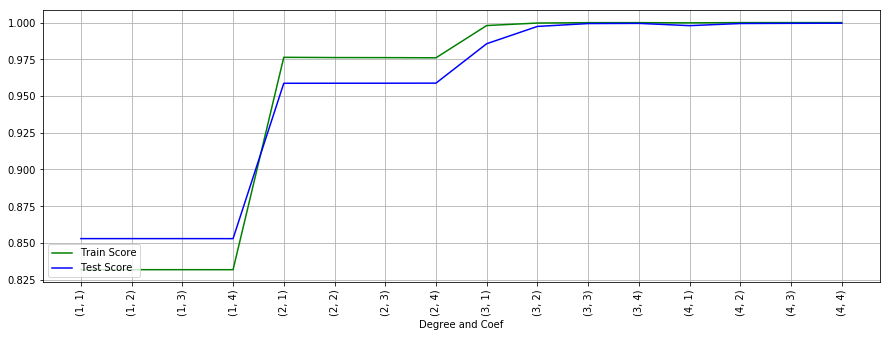

In [111]:

%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(range(len(index)), train_score_list, c = 'g', label = 'Train Score')
plt.plot(range(len(index)), test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.grid(True)
plt.xticks(range(len(index)), index, rotation=90)
plt.xlabel(r'Degree and Coef')

Best Parameter ( Degree=4 Coef=4)

In [112]:
svr_poly = SVR(kernel='poly', C=200, degree=4, epsilon=.1,coef0=4)
svr_poly.fit(X_train,y_train)


print("Train scores: {}".format(svr_poly.score(X_train, y_train)))
print("Test scores: {}".format(svr_poly.score(X_test, y_test)))
scorestrain = cross_val_score(svr_poly, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(svr_poly, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

Train scores: 0.9999400074641404
Test scores: 0.9995282057015025
Cross-validation Train scores: 0.9968662998652121
Cross-validation Test scores: 0.8687102005248898


# Best Regressors - 1) Polynomial Regression

In [113]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg = LinearRegression()
lreg.fit(X_train_poly, y_train)
print("Train scores: {}".format(lreg.score(X_train_poly, y_train)))
print("Test scores: {}".format(lreg.score(X_test_poly, y_test)))
scorestrain = cross_val_score(lreg, X_train_poly, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(lreg, X_test_poly, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

pred = lreg.predict(X_test_poly)

print("Min of Pred: {}".format(min(pred)))
print("Max of Pred: {}".format(max(pred)))
print("Min of Y test: {}".format(min(y_test)))
print("Max of Y test: {}".format(max(y_test)))

Train scores: 1.0
Test scores: 0.9999998347603218
Cross-validation Train scores: 0.999984393555084
Cross-validation Test scores: 0.9694680301206704
Min of Pred: 0.27999999999998904
Max of Pred: 45.98336178275531
Min of Y test: 0.28
Max of Y test: 45.983999999999995


Plot Actual and Precited Line

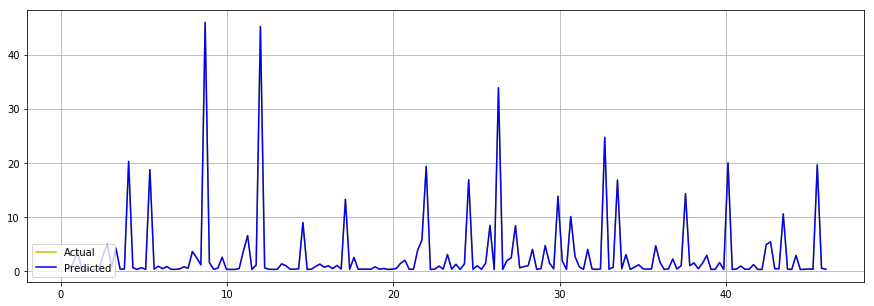

In [114]:
x_range = np.linspace(0.26, 46, 180).reshape(-1,)
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(x_range, y_test, c = 'y', label = 'Actual')
plt.plot(x_range, pred, c = 'b', label = 'Predicted')
#plt.xscale('log')
plt.legend(loc = 3)
plt.grid(True)
#plt.xlabel(r'Degree')

Actual Line and Predicted Line are completely overlapped.

# 2) SVR Polynomial Kernel

In [115]:
svr_poly = SVR(kernel='poly', C=200, degree=4, epsilon=.1,coef0=4)
svr_poly.fit(X_train,y_train)


print("Train scores: {}".format(svr_poly.score(X_train, y_train)))
print("Test scores: {}".format(svr_poly.score(X_test, y_test)))
scorestrain = cross_val_score(svr_poly, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(svr_poly, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

pred = svr_poly.predict(X_test)

print("Min of Pred: {}".format(min(pred)))
print("Max of Pred: {}".format(max(pred)))
print("Min of Y test: {}".format(min(y_test)))
print("Max of Y test: {}".format(max(y_test)))

Train scores: 0.9999400074641404
Test scores: 0.9995282057015025
Cross-validation Train scores: 0.9968662998652121
Cross-validation Test scores: 0.8687102005248898
Min of Pred: 0.24817490305508016
Max of Pred: 46.113962545882934
Min of Y test: 0.28
Max of Y test: 45.983999999999995


Plot Actual and Predicted Line

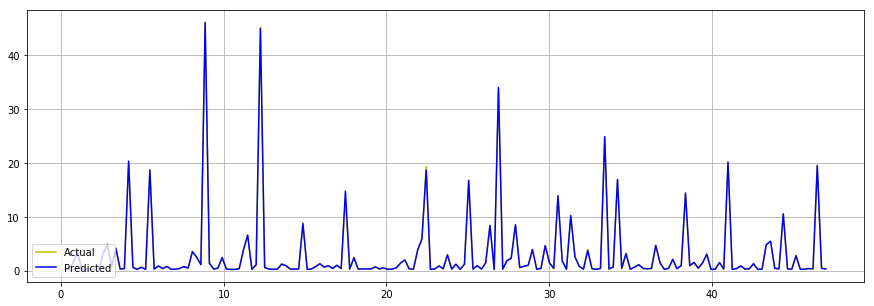

In [116]:
x_range = np.linspace(0.24, 47, 180).reshape(-1,)
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(x_range, y_test, c = 'y', label = 'Actual')
plt.plot(x_range, pred, c = 'b', label = 'Predicted')
#plt.xscale('log')
plt.legend(loc = 3)
plt.grid(True)
#plt.xlabel(r'Degree')

Actual Line and Precited Line are completely overlapped

# Classification

In [117]:
y = data['Risk']
X=data.drop(['Risk','Audit_Risk'],axis=1, inplace=False)


In [118]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train_dt, X_test_dt, y_train, y_test = train_test_split(X,y,random_state=0,)

Scaler= MinMaxScaler()
X_train = Scaler.fit_transform(X_train_dt)
X_test = Scaler.transform(X_test_dt)

# LinearSVC

In [119]:

from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train,y_train)

print("Train scores: {}".format(clf.score(X_train, y_train)))
print("Test scores: {}".format(clf.score(X_test, y_test)))
scorestrain = cross_val_score(clf, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(clf, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

Train scores: 0.9851301115241635
Test scores: 0.9777777777777777
Cross-validation Train scores: 0.9758431615973514
Cross-validation Test scores: 0.9498055015282022


# Logistic Regression

In [120]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print("Train scores: {}".format(logreg.score(X_train, y_train)))
print("Test scores: {}".format(logreg.score(X_test, y_test)))
scorestrain = cross_val_score(logreg, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(logreg, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

Train scores: 0.9721189591078067
Test scores: 0.9611111111111111
Cross-validation Train scores: 0.9721394578936478
Cross-validation Test scores: 0.9496202648883948


# KNN Classification

In [121]:
from sklearn.neighbors import KNeighborsClassifier  

train_score_list = []
test_score_list = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_list.append(knn.score(X_train, y_train))
    test_score_list.append(knn.score(X_test, y_test))
    
print(train_score_list)
print(test_score_list)

[1.0, 0.9869888475836431, 0.9869888475836431, 0.9795539033457249, 0.9758364312267658, 0.9758364312267658, 0.9758364312267658, 0.966542750929368, 0.966542750929368, 0.9591078066914498, 0.9721189591078067, 0.966542750929368, 0.9684014869888475, 0.9646840148698885, 0.9646840148698885, 0.9591078066914498, 0.9609665427509294, 0.9628252788104089, 0.9628252788104089]
[0.9611111111111111, 0.95, 0.9555555555555556, 0.95, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9444444444444444, 0.9666666666666667, 0.9611111111111111, 0.9611111111111111, 0.9611111111111111, 0.9611111111111111, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556]


Text(0.5,0,'K')

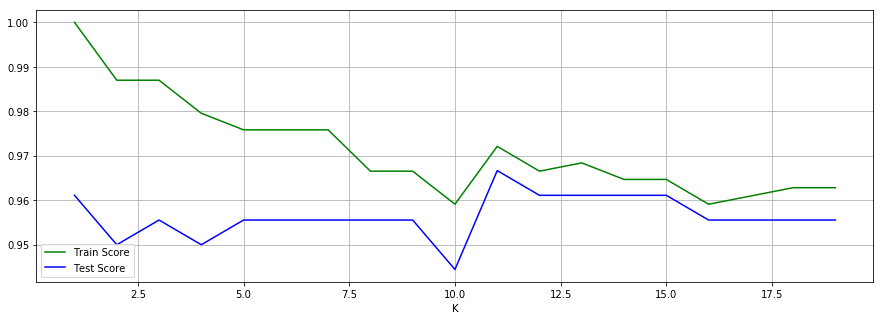

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(range(1,20), train_score_list, c = 'g', label = 'Train Score')
plt.plot(range(1,20), test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.grid(True)
plt.xlabel('K')

Best Parameter K =11

In [123]:
knn = KNeighborsClassifier(11)
knn.fit(X_train, y_train)
print("Train scores: {}".format(knn.score(X_train, y_train)))
print("Test scores: {}".format(knn.score(X_test, y_test)))
scorestrain = cross_val_score(knn, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(knn, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

Train scores: 0.9721189591078067
Test scores: 0.9666666666666667
Cross-validation Train scores: 0.9647113594040967
Cross-validation Test scores: 0.9219273872371955


# SVC Kernel - RBF

In [124]:
from sklearn.svm import SVC

c_range = [1,10,100,200,300]
g_range = [0.01,0.1,1,5]

train_score_list = []
test_score_list = []
index=[]

for x in c_range:
    for g in g_range:
        index.append((x,g))
        svc_rbf = SVC(kernel='rbf', gamma=g,C=x)
        svc_rbf.fit(X_train,y_train)
        train_score_list.append(svc_rbf.score(X_train,y_train))
        test_score_list.append(svc_rbf.score(X_test, y_test))

In [125]:
print(train_score_list)
print(test_score_list)

[0.9423791821561338, 0.9684014869888475, 0.9851301115241635, 0.9869888475836431, 0.9684014869888475, 0.9795539033457249, 0.9888475836431226, 0.9925650557620818, 0.9776951672862454, 0.9869888475836431, 0.9944237918215614, 0.9962825278810409, 0.983271375464684, 0.9925650557620818, 0.9962825278810409, 0.9981412639405205, 0.9869888475836431, 0.9944237918215614, 0.9962825278810409, 0.9981412639405205]
[0.9166666666666666, 0.9666666666666667, 0.9666666666666667, 0.9611111111111111, 0.9666666666666667, 0.9555555555555556, 0.9666666666666667, 0.9666666666666667, 0.9777777777777777, 0.9722222222222222, 0.9833333333333333, 0.9722222222222222, 0.9777777777777777, 0.9666666666666667, 0.9833333333333333, 0.9666666666666667, 0.9777777777777777, 0.9666666666666667, 0.9833333333333333, 0.9611111111111111]


Text(0.5,0,'C and Gamma')

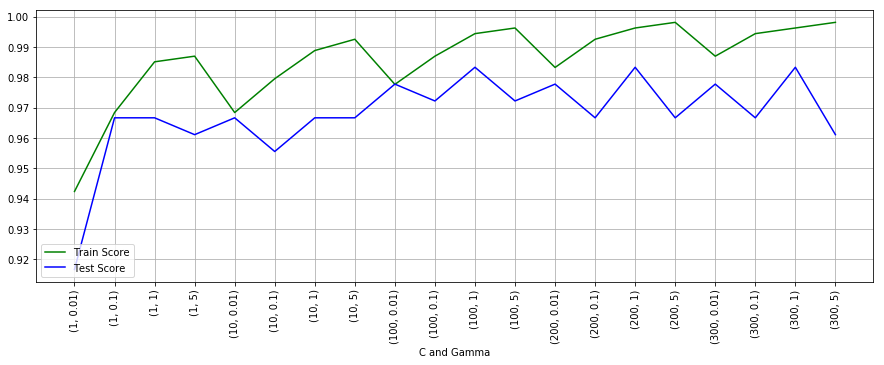

In [126]:

%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(range(len(index)), train_score_list, c = 'g', label = 'Train Score')
plt.plot(range(len(index)), test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.grid(True)
plt.xticks(range(len(index)), index, rotation=90)
plt.xlabel(r'C and Gamma')

Best Parameters = (gamma=1, c=200)

In [128]:
svc_rbf = SVC(kernel='rbf', gamma=1,C=200)
svc_rbf.fit(X_train,y_train)

print("Train scores: {}".format(svc_rbf.score(X_train, y_train)))
print("Test scores: {}".format(svc_rbf.score(X_test, y_test)))
scorestrain = cross_val_score(svc_rbf, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(svc_rbf, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

Train scores: 0.9962825278810409
Test scores: 0.9833333333333333
Cross-validation Train scores: 0.9776950134492034
Cross-validation Test scores: 0.9446173319749313


# SVC Kernel - Linear

In [129]:
c_range = [1,10,100,200,300]

train_score_list = []
test_score_list = []

for x in c_range:
    svc_lin = SVC(kernel='linear', C=x)
    svc_lin.fit(X_train,y_train)
    train_score_list.append(svc_lin.score(X_train,y_train))
    test_score_list.append(svc_lin.score(X_test, y_test))

print(train_score_list)
print(test_score_list)

[0.9758364312267658, 0.9869888475836431, 0.9907063197026023, 0.9925650557620818, 0.9944237918215614]
[0.9777777777777777, 0.9777777777777777, 0.9666666666666667, 0.9833333333333333, 0.9888888888888889]


Text(0.5,0,'C')

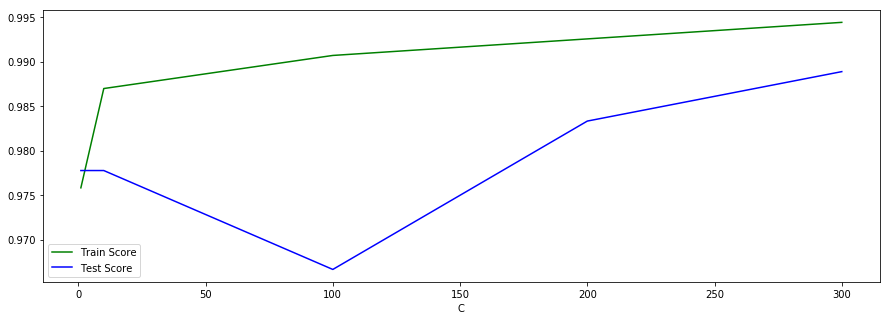

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(c_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(c_range, test_score_list, c = 'b', label = 'Test Score')
#plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'C')

Best Parameter C=300

In [132]:
from sklearn.metrics import confusion_matrix
import statistics

svc_lin = SVC(kernel='linear', C=300)
svc_lin.fit(X_train,y_train)

print("Train scores: {}".format(svc_lin.score(X_train, y_train)))
print("Test scores: {}".format(svc_lin.score(X_test, y_test)))
scorestrain = cross_val_score(svc_lin, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(svc_lin, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

Train scores: 0.9944237918215614
Test scores: 0.9888888888888889
Cross-validation Train scores: 0.9869853093316779
Cross-validation Test scores: 0.9609166126393133


# SVC Kernel - Polynomial

In [133]:
deg_range = [1,2,3,4]
c_range = [1,10,100,200,300]


train_score_list = []
test_score_list = []
index=[]

for x in deg_range:
    for c in c_range:
        index.append((x,c))
        svc_poly = SVC(kernel='poly', degree=x, C=c)
        svc_poly.fit(X_train,y_train)
        train_score_list.append(svc_poly.score(X_train,y_train))
        test_score_list.append(svc_poly.score(X_test, y_test))

Text(0.5,0,'Degree and C')

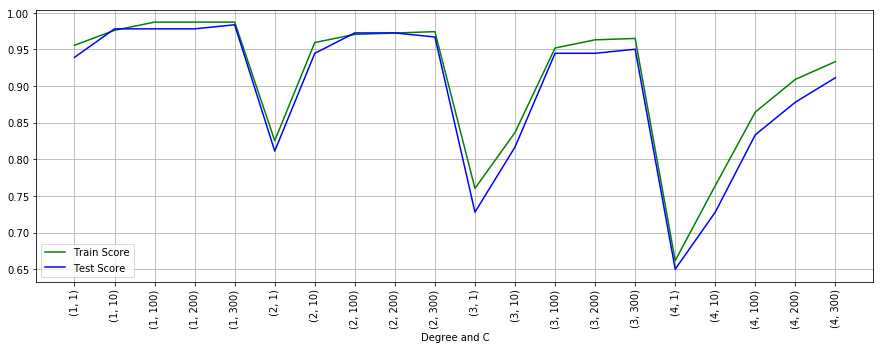

In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(range(len(index)), train_score_list, c = 'g', label = 'Train Score')
plt.plot(range(len(index)), test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.grid(True)
plt.xticks(range(len(index)), index, rotation=90)
plt.xlabel(r'Degree and C')

Best Parameter (C=300, Degree=2 )

In [135]:
svc_poly = SVC(kernel='poly', degree=2, C=300)
svc_poly.fit(X_train,y_train)

print("Train scores: {}".format(svc_poly.score(X_train, y_train)))
print("Test scores: {}".format(svc_poly.score(X_test, y_test)))
scorestrain = cross_val_score(svc_poly, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(svc_poly, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

Train scores: 0.9739776951672863
Test scores: 0.9666666666666667
Cross-validation Train scores: 0.9702876060417959
Cross-validation Test scores: 0.9553610570837577


# Decision Tree 

In [136]:
from sklearn.tree import DecisionTreeClassifier

y = data['Risk']
X=data.drop(['Risk','Audit_Risk'],axis=1, inplace=False)

from sklearn.model_selection import train_test_split
X_train_dt, X_test_dt, y_train, y_test = train_test_split(X,y,random_state=0,)

dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train_dt, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train_dt, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_dt, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.994


In [137]:
m_range = [1,2,3,4,5]

train_score_list = []
test_score_list = []

for m in m_range:
    dtree = DecisionTreeClassifier(max_depth=m, random_state=0)
    dtree.fit(X_train_dt, y_train)
    train_score_list.append(dtree.score(X_train_dt,y_train))
    test_score_list.append(dtree.score(X_test_dt, y_test))


In [138]:
print(train_score_list)
print(test_score_list)

[0.9405204460966543, 0.9925650557620818, 0.9944237918215614, 0.9944237918215614, 1.0]
[0.9388888888888889, 0.9944444444444445, 0.9888888888888889, 0.9888888888888889, 0.9944444444444445]


Text(0.5,0,'Max Depth')

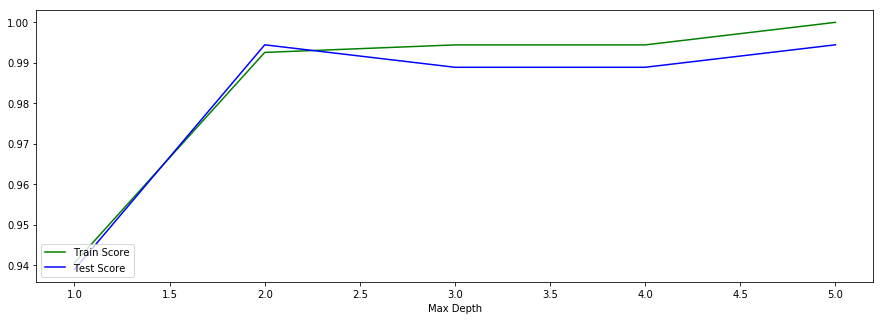

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(m_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(m_range, test_score_list, c = 'b', label = 'Test Score')
#plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'Max Depth')

Best Parameter Max Dept=2

In [141]:
dtree = DecisionTreeClassifier(max_depth=2, random_state=0)
dtree.fit(X_train_dt, y_train)
scorestrain = cross_val_score(dtree, X_train_dt, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(dtree, X_test_dt, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

Cross-validation Train scores: 0.9925822470515208
Cross-validation Test scores: 0.9888858016115588


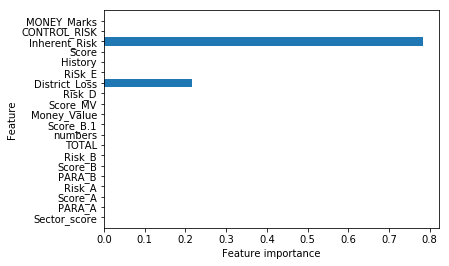

In [142]:
%matplotlib inline
def plot_feature_importances_cancer(model):
    n_features = X_train_dt.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train_dt.columns.values)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(dtree)

# Best Classifications - 1) Decision Tree

In [143]:

dtree = DecisionTreeClassifier(max_depth=2,random_state=0)

dtree.fit(X_train_dt, y_train)
pred=dtree.predict(X_test_dt)

confusion = confusion_matrix(y_test, pred)
print("Confusion matrix:\n{}".format(confusion))
print("Accuracy in predicting Risk :",(statistics.mean(y_test==pred)*100),'%')

Confusion matrix:
[[115   0]
 [  1  64]]
Accuracy in predicting Risk : 99.44444444444444 %


# 2) SVC Kernel Linear

In [144]:
#Scaler= MinMaxScaler()
#X_train = Scaler.fit_transform(X_train_dt)
#X_test = Scaler.transform(X_test_dt)


from sklearn.metrics import confusion_matrix
import statistics

svc_lin = SVC(kernel='linear', C=300)
svc_lin.fit(X_train,y_train)

print("Train scores: {}".format(svc_lin.score(X_train, y_train)))
print("Test scores: {}".format(svc_lin.score(X_test, y_test)))
scorestrain = cross_val_score(svc_lin, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(svc_lin, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

pred = svc_lin.predict(X_test)

confusion = confusion_matrix(y_test, pred)
print("Confusion matrix:\n{}".format(confusion))
print("Accuracy in predicting Risk :",(statistics.mean(y_test==pred)*100),'%')

Train scores: 0.9944237918215614
Test scores: 0.9888888888888889
Cross-validation Train scores: 0.9869853093316779
Cross-validation Test scores: 0.9609166126393133
Confusion matrix:
[[115   0]
 [  2  63]]
Accuracy in predicting Risk : 98.88888888888889 %
